# Chapter 08. Statistics

- Assume that there are 100 students in the Applied Data Analysis class
- We obtained a sample of 30 students as follows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df = pd.read_csv("ADA_Chapter08_Code_Dataset.csv")
df.head()

,Student No.,Gender,Department,Height,Score
0,1,0,A,168,70
1,2,0,B,169,85
2,3,0,C,170,100
3,4,0,A,171,75
4,5,0,B,172,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Student No.  30 non-null     int64 
 1   Gender       30 non-null     int64 
 2   Department   30 non-null     object
 3   Height       30 non-null     int64 
 4   Score        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [ ]:
df.describe()

,Student No.,Gender,Height,Score
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.500000,169.000000,77.500000
std,8.803408,0.508548,7.520088,20.833908
min,1.000000,0.000000,156.000000,20.000000
25%,8.250000,0.000000,163.250000,70.000000
50%,15.500000,0.500000,169.000000,80.000000
75%,22.750000,1.000000,174.750000,90.000000
max,30.000000,1.000000,182.000000,100.000000


## Height and Score difference by Gender

In [5]:
df.groupby('Gender')[['Height', 'Score']].mean()

,Height,Score
Gender,,
0,175.0,77.0
1,163.0,78.0


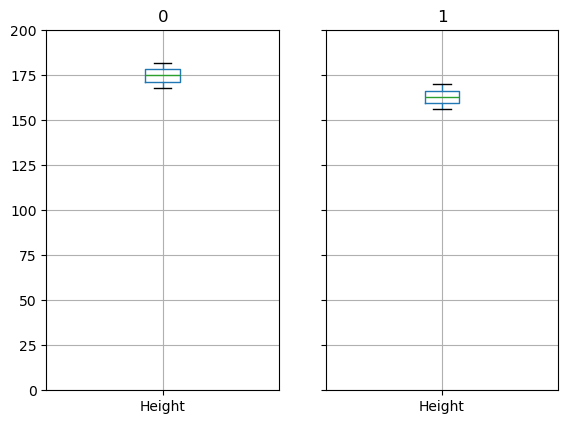

In [6]:
df.groupby('Gender')[['Height']].boxplot()
plt.ylim(0, 200)
plt.show()

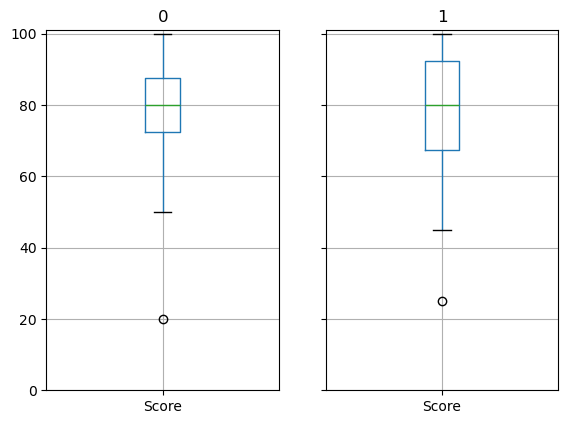

In [7]:
df.groupby('Gender')[['Score']].boxplot()
plt.ylim(0, 101)
plt.show()

## Height and Score difference by Department

In [8]:
df.groupby('Department')[['Height', 'Score']].mean()

,Height,Score
Department,,
A,168.0,64.5
B,169.0,77.5
C,170.0,90.5


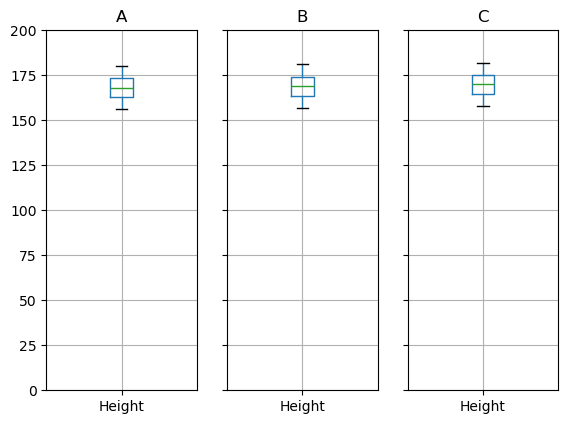

In [9]:
df.groupby('Department')[['Height']].boxplot(layout=(1,3))
plt.ylim(0, 200)
plt.show()

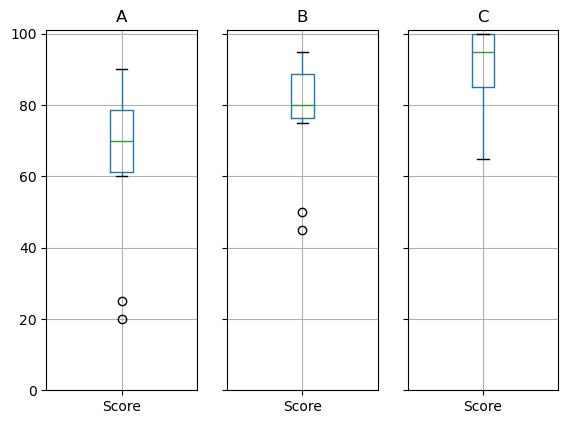

In [10]:
df.groupby('Department')[['Score']].boxplot(layout=(1,3))
plt.ylim(0, 101)
plt.show()

## Statistical Test

In [11]:
from scipy import stats

### 1. One-samle t-test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
- Calculate the T-test for the mean of ONE group of scores
- This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean

In [12]:
expected_pop_mean = 65
result = stats.ttest_1samp(df['Score'], expected_pop_mean)
result

TtestResult(statistic=3.2862446912554106, pvalue=0.002659619845104219, df=29)

In [13]:
expected_pop_mean = 65
result = stats.ttest_1samp(df['Score'], expected_pop_mean, alternative='greater')
result

TtestResult(statistic=3.2862446912554106, pvalue=0.0013298099225521095, df=29)

In [14]:
expected_pop_mean = 65
result = stats.ttest_1samp(df['Score'], expected_pop_mean, alternative='less')
result

TtestResult(statistic=3.2862446912554106, pvalue=0.998670190077448, df=29)

### 2. Independent t-test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- Calculate the T-test for the means of two independent samples of scores
- This is a test for the null hypothesis that 2 independent samples have identical average (expected) values

#### 2-1. Height Difference

In [15]:
result = stats.ttest_ind(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'])
result

TtestResult(statistic=7.3484692283495345, pvalue=5.306232131621443e-08, df=28.0)

In [16]:
result = stats.ttest_ind(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'], alternative='greater')
result

TtestResult(statistic=7.3484692283495345, pvalue=2.6531160658107214e-08, df=28.0)

In [17]:
result = stats.ttest_ind(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'], alternative='less')
result

TtestResult(statistic=7.3484692283495345, pvalue=0.9999999734688394, df=28.0)

#### 2-2. Score Difference

In [18]:
result = stats.ttest_ind(df[df['Gender']==0]['Score'], df[df['Gender']==1]['Score'])
result

TtestResult(statistic=-0.12920202688807664, pvalue=0.8981214390189158, df=28.0)

In [19]:
result = stats.ttest_ind(df[df['Gender']==0]['Score'], df[df['Gender']==1]['Score'], alternative='greater')
result

TtestResult(statistic=-0.12920202688807664, pvalue=0.5509392804905421, df=28.0)

In [20]:
result = stats.ttest_ind(df[df['Gender']==0]['Score'], df[df['Gender']==1]['Score'], alternative='less')
result

TtestResult(statistic=-0.12920202688807664, pvalue=0.4490607195094579, df=28.0)

### 3. Mann-Whitney U rank test (non-parametric)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
- Perform the Mann-Whitney U rank test on two independent samples
- The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y

In [21]:
result = stats.mannwhitneyu(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'])
result

MannwhitneyuResult(statistic=220.5, pvalue=8.181408323772006e-06)

In [22]:
result = stats.mannwhitneyu(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'], alternative='greater')
result

MannwhitneyuResult(statistic=220.5, pvalue=4.090704161886003e-06)

In [23]:
result = stats.mannwhitneyu(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'], alternative='less')
result

MannwhitneyuResult(statistic=220.5, pvalue=0.9999966321369997)

### 4. Paired t-test


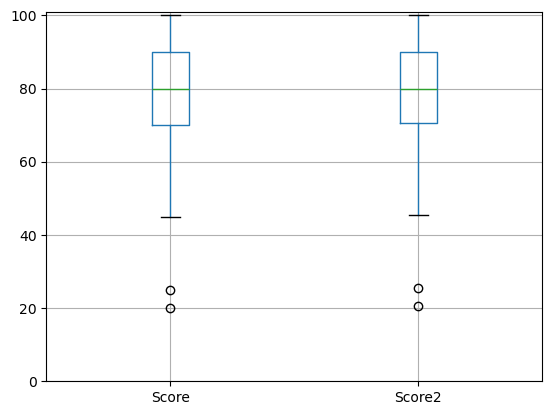

In [24]:
# Assume that the 30 students take the exam again after taking my special lecture :)
df['Score2'] = df['Score'].apply(lambda x: x+0.5 if x<=70 else x)

df[['Score', 'Score2']].boxplot()
plt.ylim(0, 101)
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
- Calculate the t-test on TWO RELATED samples of scores, a and b.
- This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

In [25]:
result = stats.ttest_rel(df['Score'], df['Score2'], alternative='two-sided')
result

TtestResult(statistic=-3.5254179083580186, pvalue=0.0014258274179025608, df=29)

In [26]:
result = stats.ttest_rel(df['Score'], df['Score2'], alternative='greater')
result

TtestResult(statistic=-3.5254179083580186, pvalue=0.9992870862910488, df=29)

In [27]:
result = stats.ttest_rel(df['Score'], df['Score2'], alternative='less')
result

TtestResult(statistic=-3.5254179083580186, pvalue=0.0007129137089512804, df=29)

### 5. Wilcoxon Signed-Rank Test (non-parametric)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
- Calculate the Wilcoxon signed-rank test
- The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution.
- It is a non-parametric version of the paired T-test.

In [28]:
# Assume that the 30 students take the exam again after taking my special lecture :)
df['Score2'] = df['Score']+5 

result = stats.wilcoxon(df['Score'], df['Score2'])
result

WilcoxonResult(statistic=0.0, pvalue=1.862645149230957e-09)

### 6. ANOVA
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

- Perform one-way ANOVA.
- 
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes

In [29]:
result = stats.f_oneway(df[df['Department']=='A']['Height'], df[df['Department']=='B']['Height'], df[df['Department']=='C']['Height'])
result

F_onewayResult(statistic=0.16666666666666666, pvalue=0.8473459298091824)

In [30]:
result = stats.f_oneway(df[df['Department']=='A']['Score'], df[df['Department']=='B']['Score'], df[df['Department']=='C']['Score'])
result

F_onewayResult(statistic=4.955742601140375, pvalue=0.014680143251709138)

In [31]:
result = stats.f_oneway(df[df['Gender']==0]['Height'], df[df['Gender']==1]['Height'])
result

F_onewayResult(statistic=54.0, pvalue=5.306232131621449e-08)

### 7. Kruskal-Wallis Test (non-parametric)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
- Compute the Kruskal-Wallis H-test for independent samples

In [32]:
result = stats.kruskal(df[df['Department']=='A']['Height'], df[df['Department']=='B']['Height'], df[df['Department']=='C']['Height'])
result

KruskalResult(statistic=0.37186108637576804, pvalue=0.8303312651417938)

In [33]:
result = stats.kruskal(df[df['Department']=='A']['Score'], df[df['Department']=='B']['Score'], df[df['Department']=='C']['Score'])
result

KruskalResult(statistic=9.351633986928094, pvalue=0.009317909356087518)